Dealing with scoring. Will convert to scripts later 


- must check that size of y and size of scoring file the same
- 

# This jupyter file has code for all graphs and tables at the member level

In [1]:
# https://programtalk.com/vs2/?source=python/13717/brew/brew/metrics/diversity/paired.py

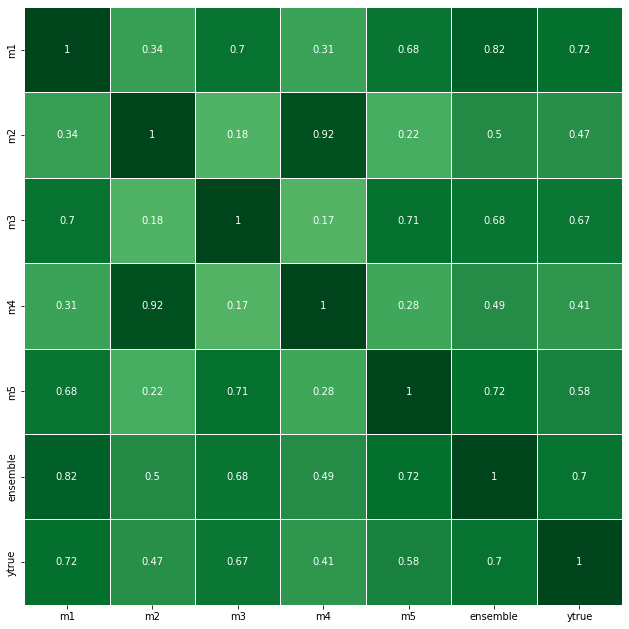

In [2]:
from ScoringAnalysis import ScoringAnalysis
import seaborn as sns
import matplotlib.pyplot as plt
import os
sa = ScoringAnalysis('bagboost', '11', False)
#sa.agreement_heatmap(seed=169, draw=True, save=False)


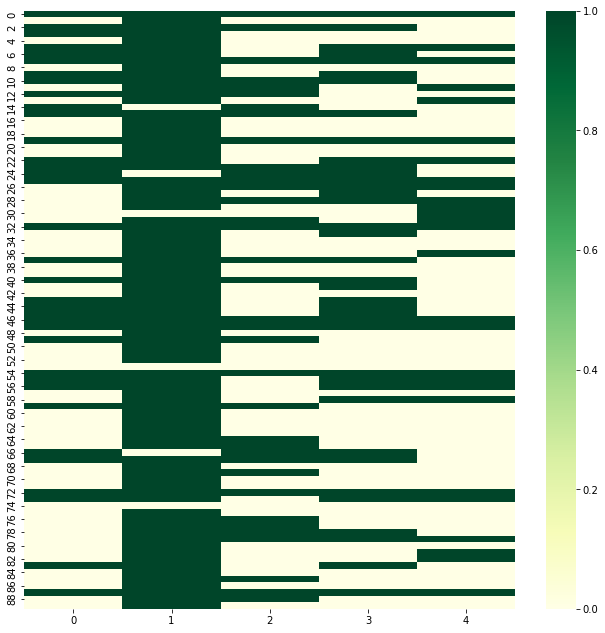

In [3]:
sa.perinstance_heatmap(seed=0, draw=True, save=False)

<AxesSubplot:>

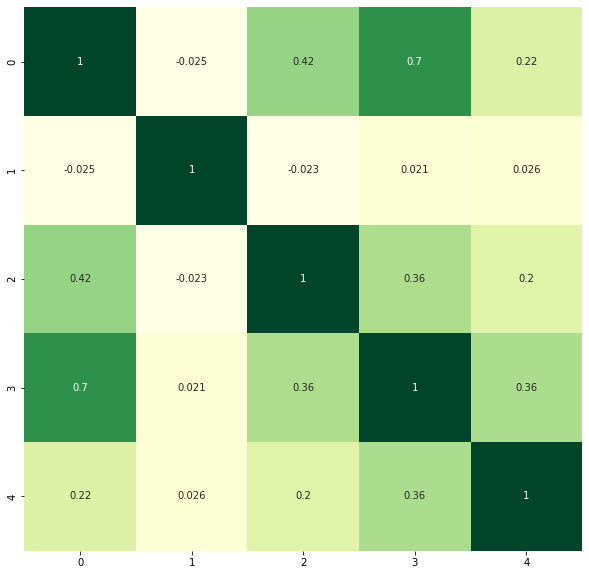

In [4]:
import numpy as np
from sklearn.metrics import cohen_kappa_score

plt.figure(figsize=(10,10))
sa.scoring[0].shape
X = []
for i, member1 in enumerate(sa.scoring[0]):
    for j, member2 in enumerate(sa.scoring[0]):
        #print(f'{i} {j}')
        X.append(cohen_kappa_score(member1, member2))
X = np.array(X).reshape(5,5)
sns.heatmap(X, cmap='YlGn', annot=True, cbar=False)

In [5]:
'''for job in ['bagboost', 'bagmogp', 'fastbag_ham', 'm3gpbag', 'mogp500']:
    for task in os.listdir(f'results_finished/{job}'):
        sa = ScoringAnalysis(job=job, task=task, training=False)
        sa.save_table(f'div_{job}_{task}')
        break'''


"for job in ['bagboost', 'bagmogp', 'fastbag_ham', 'm3gpbag', 'mogp500']:\n    for task in os.listdir(f'results_finished/{job}'):\n        sa = ScoringAnalysis(job=job, task=task, training=False)\n        sa.save_table(f'div_{job}_{task}')\n        break"

In [6]:
'''job = 'fastbag_ham_new'
tasks = []
for task in os.listdir(f'results_finished/{job}'):
    sa = ScoringAnalysis(job=job, task=task, training=False)
    tasks.append(sa.metric_table)'''

/Users/ferguscurrie/Documents/Uni/Research/Implementations/ScoringAnalysis.py:285: RuntimeWarning: invalid value encountered in double_scalars
  div[div_i] = float((a * d - b * c)) / \
/Users/ferguscurrie/Documents/Uni/Research/Implementations/ScoringAnalysis.py:285: RuntimeWarning: invalid value encountered in double_scalars
  div[div_i] = float((a * d - b * c)) / \
/Users/ferguscurrie/Documents/Uni/Research/Implementations/ScoringAnalysis.py:285: RuntimeWarning: invalid value encountered in double_scalars
  div[div_i] = float((a * d - b * c)) / \


In [10]:
nptasks = np.array(tasks)
nptasks.shape

(19, 30, 8)

In [41]:
import pandas as pd
n_models =2
metrics = ['kuncheva_entropy_measure', 'kuncheva_kw', 'entropy_measure_e', 'kohavi_wolpert_variance', 'kuncheva_double_fault_measure', 'kuncheva_disagreement_measure', 'kuncheva_correlation_coefficient_p', 'kuncheva_q_statistics']
avg = np.nanmean(nptasks, axis =(1))

npfastbag = np.empty((10, len(metrics))) 
npfastbag[:7] = avg[:7]
npfastbag[8:] = avg[7:9]

npfastbagham = avg[9:]

npfastbag = np.mean(npfastbag, axis=0)
npfastbagham = np.mean(npfastbagham, axis=0)

print(npfastbag.shape)
print(npfastbagham.shape)
combine = np.empty((n_models, len(metrics)))
combine[0] = npfastbag
combine[1] = npfastbagham

dfavg = pd.DataFrame(data=combine, columns = metrics)
dfavg.index = ['fastbag', 'fastbag_ham']
dfavg.transpose()

(8,)
(8,)


,fastbag,fastbag_ham
kuncheva_entropy_measure,0.554829,0.547560
kuncheva_kw,0.174703,0.175345
entropy_measure_e,0.153342,0.159115
kohavi_wolpert_variance,0.488095,0.546760
kuncheva_double_fault_measure,0.164539,0.241507
kuncheva_disagreement_measure,0.400784,0.445772
kuncheva_correlation_coefficient_p,-0.001483,0.001997
kuncheva_q_statistics,-0.013479,-0.073440
